In [25]:
# Import the necessary libraries
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt

In [26]:
# Ensure you have the correct path to your model
MODEL_PATH = 'models/model_CNN_final_epoch40.h5'

# Load your trained model
new_model = load_model(MODEL_PATH)
print('Model loaded.')

Model loaded.


In [27]:
dic = {0 : 'bercak kering',
       1 : 'daun sehat',
       2 : 'embun tepung',
       3 : 'tenggorok daun'}

In [42]:
def predict_label(img_path):
	img = image.load_img(img_path, target_size=(224,224))
	img_array = image.img_to_array(img)/255.0
	img_array = np.expand_dims(img_array, axis=0)
	prediction = new_model.predict(img_array)
	predicted_class = np.argmax(prediction, axis=1)
	return dic[predicted_class[0]]

def predict_class(img_path):
	img = image.load_img(img_path, target_size=(224,224))
	img_array = image.img_to_array(img)/255.0
	img_array = np.expand_dims(img_array, axis=0)
	prediction = new_model.predict(img_array)
	return np.round(prediction[0] * 100)

In [45]:
# Upload an image
uploaded = files.upload()

# Get the file path
for fn in uploaded.keys():
    file_path = fn
    break

predict = predict_label(file_path)
prediction = predict_class(file_path)

if np.all(prediction < 80):
    print(f'Predicted: Not Found')
    print(f'Predicted Class: {prediction}')
else:
    print(f'Predicted: {predict}')
    print(f'Predicted Class: {prediction}')

Saving 226.jpg to 226 (1).jpg
1/1 [==============================] - 0s 116ms/step
Predicted: embun tepung
Predicted Class: [  0.   0. 100.   0.]


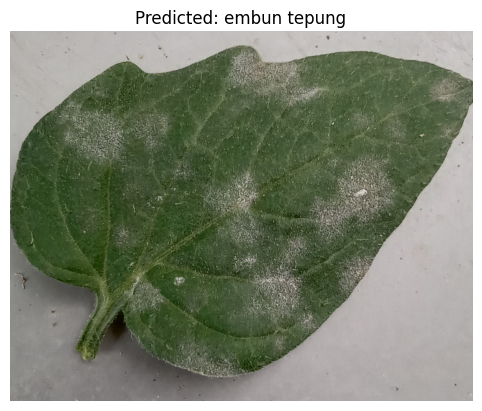

In [46]:
# Display the uploaded image
img = image.load_img(file_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted: {predict}')
plt.show()